<a href="https://colab.research.google.com/drive/1OA-6XJdk7Ujj5yuC7PdI96jEF2REJCMD#scrollTo=Kqbfprh6oQcX" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Principal Component Analysis (PCA)

## 1. Load dataset & import library

In [1]:
!gdown --folder https://drive.google.com/drive/folders/1FDfaBhqWEWhNKH0BX1S00_SU0CIZuvNj?usp=drive_link

Retrieving folder contents
Processing file 1CypV5NYf-l7CH6eovK-1rjOGNbqh8jEL X_test.csv
Processing file 1naM47Yz7se4z2161vHOGlsRPw0gZeLKd X_train.csv
Processing file 1GLNbaP-P-pDncjrz2UXT9IpH9k40Ht5G y_test.csv
Processing file 1DY3xGU4rcojDZGgNumddKqfLwgnBWJ1s y_train.csv
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1CypV5NYf-l7CH6eovK-1rjOGNbqh8jEL
To: /content/dataset_ML/X_test.csv
100% 34.0M/34.0M [00:00<00:00, 91.4MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1naM47Yz7se4z2161vHOGlsRPw0gZeLKd
From (redirected): https://drive.google.com/uc?id=1naM47Yz7se4z2161vHOGlsRPw0gZeLKd&confirm=t&uuid=58d1f4ee-2338-434a-840a-f4a767cd322f
To: /content/dataset_ML/X_train.csv
100% 136M/136M [00:01<00:00, 79.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1GLNbaP-P-pDncjrz2UXT9IpH9k40Ht5G
To: /content/dataset_ML/y_test.csv
100% 4.00k/4.00k [00:00<00:00, 

In [ ]:
import os
import cv2 as cv
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
import sklearn

## 2. Load train/test data from CSV file

In [ ]:
X_train = pd.read_csv('./dataset_ML/X_train.csv', header=None).values
y_train = pd.read_csv('./dataset_ML/y_train.csv', header=None).values
X_test = pd.read_csv('./dataset_ML/X_test.csv', header=None).values
y_test = pd.read_csv('./dataset_ML/y_test.csv', header=None).values
print(f'X_train.shape: {X_train.shape}, X_test.shape: {X_test.shape}')

X_train.shape: (3200, 3136), X_test.shape: (800, 3136)


## 3. Dimensionality Reduction using PCA

#### PCA code implementation

In [ ]:
# Define the number of components for PCA
n_components = 2  # Target dimensionality (you can change this as needed)

# Perform PCA
pca = PCA(n_components=n_components)
reduced_data = pca.fit_transform(X_train)

### Results check

In [ ]:
# Display the explained variance ratio for each principal component
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Display the shape of the reduced data
print("Shape of reduced data:", reduced_data.shape)

Explained variance ratio: [0.16286277 0.09327548]
Shape of reduced data: (3200, 2)


#### 2D visualization of PCA-reduced data

(3200, 1)


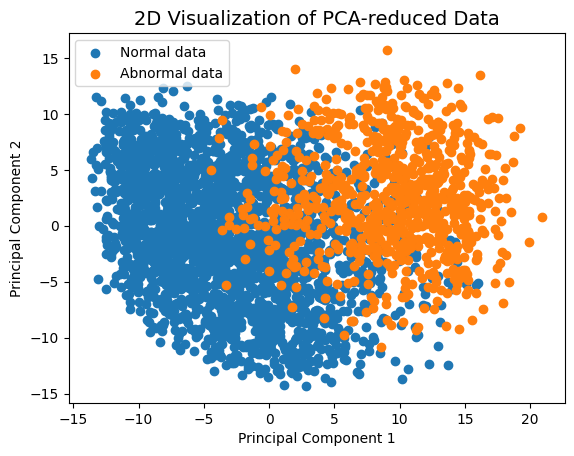

In [ ]:
norm_idx = y_train == 0
abnorm_idx = y_train == 1
print(norm_idx.shape)

norm_data = reduced_data[norm_idx.squeeze()]
abnorm_data = reduced_data[abnorm_idx.squeeze()]

plt.scatter(norm_data[:,0],norm_data[:,1], label = 'Normal data')
plt.scatter(abnorm_data[:,0],abnorm_data[:,1], label = 'Abnormal data')
plt.title('2D Visualization of PCA-reduced Data', fontsize=14)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.legend()
plt.show()